In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [4]:
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)


In [5]:
train_path = "./Train"
test_path = "./Test"


In [6]:
CATEGS = len(os.listdir(train_path))

In [7]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

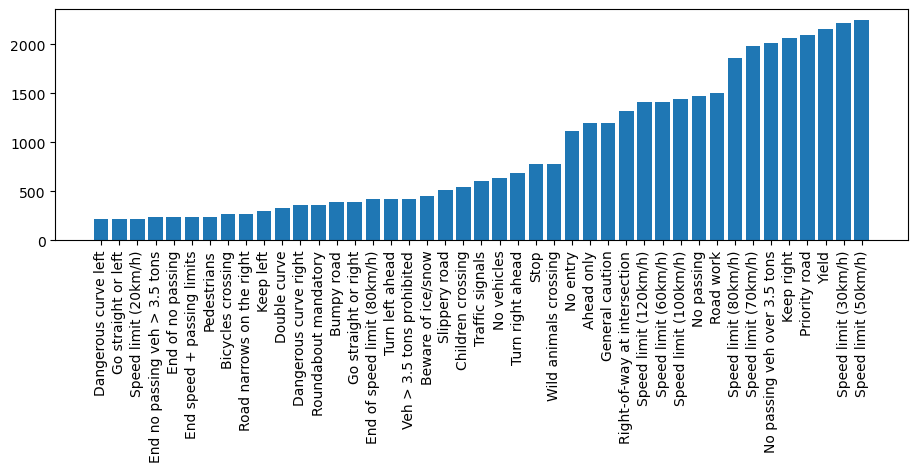

In [8]:
folders = os.listdir(train_path)

WIDTH = 30
HEIGHT = 30
CHANNELS = 3

number_of_files = []
class_number = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    number_of_files.append(len(train_files))
    class_number.append(classes[int(folder)])

zipped = zip(number_of_files, class_number)
sorted_zip = sorted(zipped)
tuples = zip(*sorted_zip)
train_files, class_number = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(11,3))  
plt.bar(class_number, train_files)
plt.xticks(class_number, rotation='vertical')
plt.show()

In [7]:
# df_train = pd.read_csv("./Train.csv")

# #Updating coordinates
# for idx, row in df_train.iterrows() :
#   w = row['Width']
#   h = row['Height']
#   if w > IMG_WIDTH :
#     diff = w-IMG_WIDTH
#     df_train.iloc[idx, 4] = df_train.iloc[idx]['Roi.X2'] - diff
#   else :
#     diff = IMG_WIDTH-w
#     df_train.iloc[idx, 4] = df_train.iloc[idx]['Roi.X2'] + diff
#   if h > IMG_HEIGHT :
#     diff = h - IMG_HEIGHT
#     df_train.iloc[idx, 5] = df_train.iloc[idx]['Roi.Y2'] - diff
#   else :
#     diff = IMG_HEIGHT - h
#     df_train.iloc[idx, 5] = df_train.iloc[idx]['Roi.Y2'] + diff

In [9]:
image_data = []
image_labels = []

for i in range(CATEGS):
    path = train_path + '/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((HEIGHT, WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(classes[i])
        except:
            print("Error in " + img)


In [10]:
# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


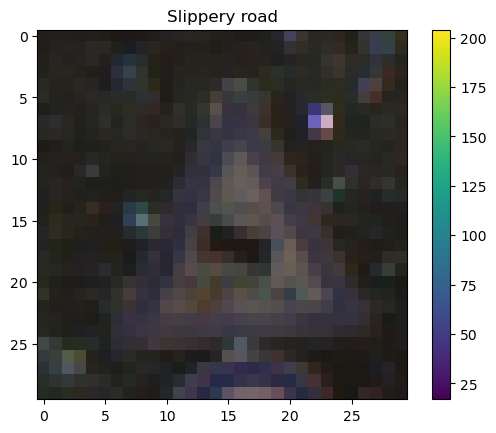

In [11]:
plt.figure()
plt.title(image_labels[27829])
plt.imshow(image_data[27829])
plt.grid(False)
plt.colorbar()
plt.show()

In [12]:
data_train, data_test, label_train, label_test = train_test_split(
    image_data,
    image_labels,
    test_size = 0.28,
    random_state = None,
    shuffle = True
)

data_train = data_train / 255
data_test = data_test / 255

print("data_train.shape", data_train.shape)
print("data_test.shape", data_test.shape)
print("label_train.shape", label_train.shape)
print("label_test.shape", label_test.shape)

data_train.shape (28230, 30, 30, 3)
data_test.shape (10979, 30, 30, 3)
label_train.shape (28230,)
label_test.shape (10979,)


In [13]:
DIMENSIUNE_IMAGINE = 20
layer1 = tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape=(30,30,3))
layer2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))
layer3 = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')
layer4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))
layer5 = tf.keras.layers.BatchNormalization(axis = -1)
layer6 = tf.keras.layers.Flatten()
layer7 = tf.keras.layers.Dense(256, activation = 'relu')
layer8 = tf.keras.layers.Dropout(rate = 0.5)
layer9 = tf.keras.layers.Dense(43, activation='softmax')

model1 = tf.keras.models.Sequential([layer1, layer2, layer3, layer4, layer5, layer6, layer7, layer8, layer9])

model1.compile(loss='sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])

In [14]:
def get_key(val):
    for key, value in classes.items():
        if val == value:
            return key
 
    return "key doesn't exist"

label_number_train = [get_key(i) for i in label_train]
label_number_train = np.array(label_number_train)
label_number_test = [get_key(i) for i in label_test]
label_number_test = np.array(label_number_test)

trained1 = model1.fit(x=data_train, y=label_number_train, epochs=5, verbose=True)

Epoch 1/5
883/883 [==============================] - 11s 12ms/step - loss: 0.6209 - accuracy: 0.8259
Epoch 2/5
883/883 [==============================] - 10s 11ms/step - loss: 0.1125 - accuracy: 0.9672
Epoch 3/5
883/883 [==============================] - 10s 11ms/step - loss: 0.0761 - accuracy: 0.9783
Epoch 4/5
883/883 [==============================] - 10s 11ms/step - loss: 0.0566 - accuracy: 0.9843
Epoch 5/5
883/883 [==============================] - 10s 12ms/step - loss: 0.0519 - accuracy: 0.9853


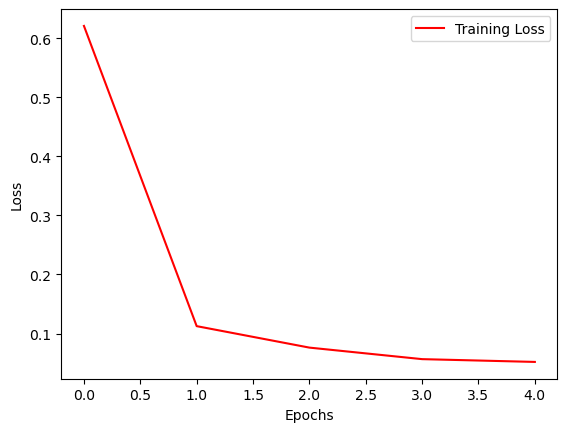

In [15]:
plt.figure()
plt.plot(range(5), trained1.history['loss'], 'r', label='Training Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

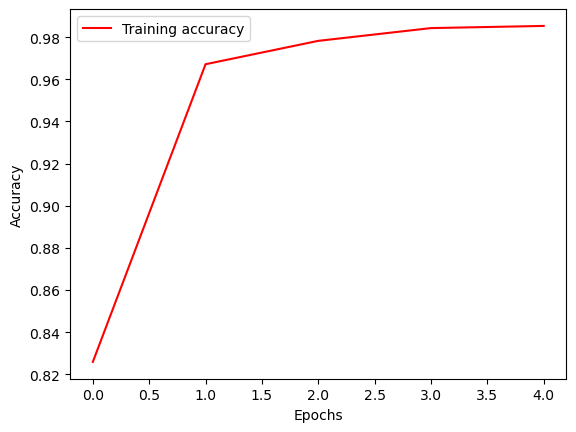

In [16]:
plt.figure()
plt.plot(range(5), trained1.history['accuracy'], 'r', label='Training accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [17]:
test_loss, test_accuracy = model1.evaluate(data_test, label_number_test, verbose = 2)
print(f"Loss: {test_loss}\nAccuracy:{test_accuracy}")

344/344 - 1s - loss: 0.0738 - accuracy: 0.9807 - 1s/epoch - 4ms/step
Loss: 0.07376711815595627
Accuracy:0.9806904196739197


In [18]:
pred1 = model1.predict(data_test)

344/344 [==============================] - 1s 4ms/step


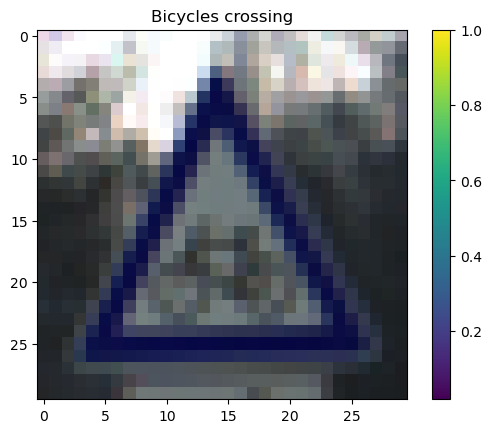

'Bicycles crossing'

In [18]:
plt.figure()
plt.title(label_test[7898])
plt.imshow(data_test[7898])
plt.grid(False)
plt.colorbar()
plt.show()

classes.get(np.argmax(pred1[7898]))

#print(f"Predicted: {classes.get(pred1[5789])}")

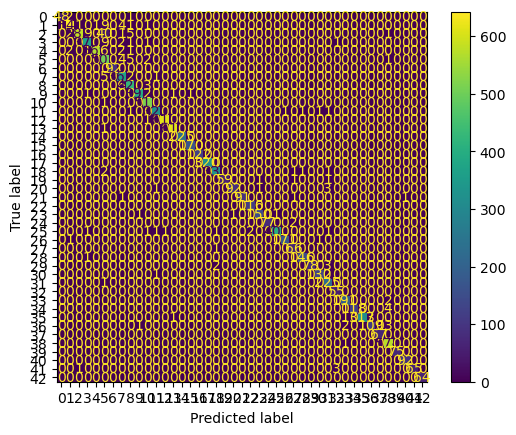

<Figure size 2000x2000 with 0 Axes>

In [29]:
preds = []
# for i in range(20):
#     index = np.random.randint(42)

#     plt.figure()
#     plt.title(label_test[index])
#     plt.imshow(data_test[index])
#     plt.grid(False)
#     plt.colorbar()
#     plt.show()

#     print(classes.get(np.argmax(pred1[index])))

for i in range(len(pred1)):
    preds.append(np.argmax(pred1[i]))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(label_number_test, preds)
diag = np.diag(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.figure(figsize=(20,20))
plt.show()

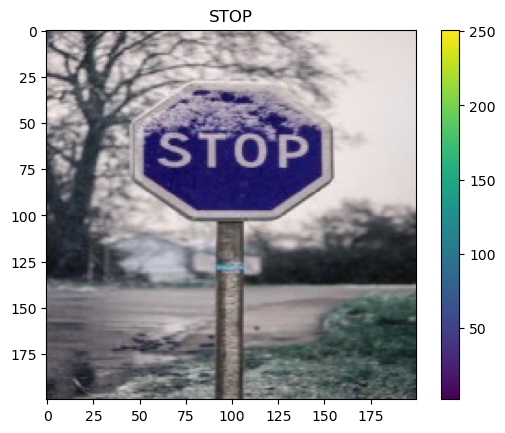

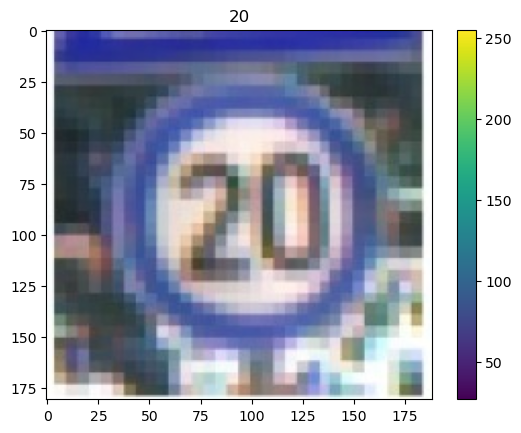

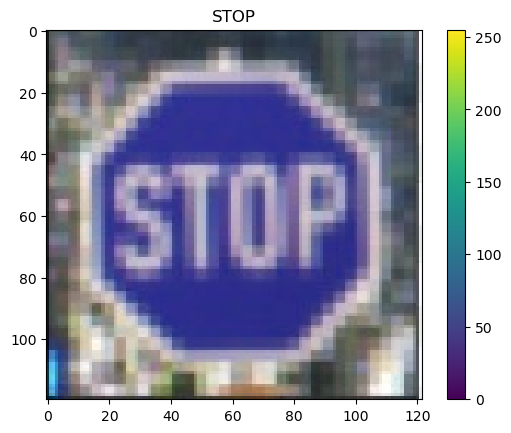

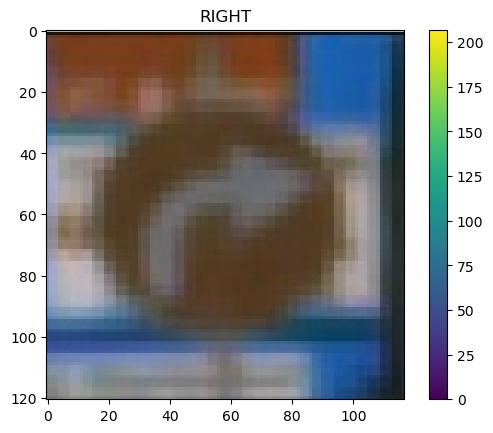

(30, 30, 3)
1/1 [==============================] - 0s 43ms/step
Speed limit (30km/h)
Speed limit (20km/h)
Stop
Turn right ahead


In [20]:
img_test_path = "./imgtest.jpg"
img1 = cv2.imread(img_test_path)

import matplotlib.pyplot as plt

#img.resize(30,30,3)


plt.figure()
plt.title("STOP")
plt.imshow(img1)
plt.grid(False)
plt.colorbar()
plt.show()
plt.close()

img_test_path = "./imgtest2.jpg"
img2 = cv2.imread(img_test_path)
#img.resize(30,30,3)

plt.figure()
plt.title("20")
plt.imshow(img2)
plt.grid(False)
plt.colorbar()
plt.show()
plt.close()

img_test_path = "./imgtest3.jpg"
img3 = cv2.imread(img_test_path)
#img.resize(30,30,3)

plt.figure()
plt.title("STOP")
plt.imshow(img3)
plt.grid(False)
plt.colorbar()
plt.show()
plt.close()

img_test_path = "./imgtest4.jpg"
img4 = cv2.imread(img_test_path)
#img.resize(30,30,3)

plt.figure()
plt.title("RIGHT")
plt.imshow(img4)
plt.grid(False)
plt.colorbar()
plt.show()
plt.close()

test = []

# image_fromarray = Image.fromarray(img1, 'RGB')
# resize_image = image_fromarray.resize((HEIGHT, WIDTH))
resize_image = cv2.resize(img1, (HEIGHT, WIDTH), interpolation = cv2.INTER_AREA)
print(resize_image.shape)
im = np.array(resize_image)
test.append(im)

resize_image = cv2.resize(img2, (HEIGHT, WIDTH), interpolation = cv2.INTER_AREA)
im = np.array(resize_image)
test.append(im)

resize_image = cv2.resize(img3, (HEIGHT, WIDTH), interpolation = cv2.INTER_AREA)
im = np.array(resize_image)
test.append(im)

resize_image = cv2.resize(img4, (HEIGHT, WIDTH), interpolation = cv2.INTER_AREA)
im = np.array(resize_image)
test.append(im)

test = np.array(test)

pred_test = model1.predict(test)

print(classes.get(np.argmax(pred_test[0])))
print(classes.get(np.argmax(pred_test[1])))
print(classes.get(np.argmax(pred_test[2])))
print(classes.get(np.argmax(pred_test[3])))


In [21]:
model1.save("../project/src/python/model.h5")

In [22]:
import requests
from requests.auth import HTTPBasicAuth

api_url = 'http://185.187.169.44:10073/team2?modelName=GTSRB'

with open('../project/src/python/model.h5', 'rb') as f:
    data = f.read()
res = requests.put(url=api_url,
                    data=data,
                    auth = HTTPBasicAuth('team2', 'BvZGcmXW39RnL5MtpzvM'),
                    headers={'Content-Type': 'application/octet-stream'})

print(res.status_code)

200
